# Setup python session and notebook

We start with importing what we will need. Note here that we want to have matplotlib to do the plot in our notebook! That means we are free to zoom and navigate in the plot even after plotting. Check out different possiblities on your own, please.

In [1]:
%matplotlib inline
import numpy as np
import pencil as pc
import matplotlib.pyplot as plt

# Get simulation as object

We will use the sample in 'pencil-code/python/tutorials/sample_simulations/2d_streaming_instability' in this notebook. So lets start by reading that simulation in as a simulation object.

In [2]:
SIM = pc.get_sim('../sample_simulations/2d_streaming_instability/')

# Build the simulation

If you havent used this sample before, you may get a warning here that there is no param.nml. Indicating us that the simulation has not been run yet and most functionallity is not given to work so far, of course.

We probaply need to compile this simulation first, make a data dir and run it. We can do that directly from here! 

Note: If you want to hide the output after the compilation was done, select that output cell and press O.

In [3]:
%%bash
cd ../sample_simulations/2d_streaming_instability/
pc_build --cleanall
pc_build

Files will be linked to the root code directory '/home/iomsn/pencil-code'.
Linking job submission/execution scripts.
Linked root Makefile.
Linking files in '/home/iomsn/pencil-code/python/tutorials/sample_simulations/2d_streaming_instability/src'.
No such file: /home/iomsn/pencil-code/src/Makefile.machine
No such file: /home/iomsn/pencil-code/src/.cvsignore
Linking files in '/home/iomsn/pencil-code/python/tutorials/sample_simulations/2d_streaming_instability/src/pre_and_post_processing'.
Linking files in '/home/iomsn/pencil-code/python/tutorials/sample_simulations/2d_streaming_instability/src/magnetic'.
Rebuilding Makefile from Makefile.src.
(cd src; make FROM_PARENT=src/ -f Makefile.src cleann)
make[1]: Entering directory '/home/iomsn/pencil-code/python/tutorials/sample_simulations/2d_streaming_instability/src'
Compiler: gfortran
GCC version: 7
rm -f *.o *.a *.mod
rm -f experimental/*.o experimental/*.mod
rm -f initial_condition/*.o initial_condition/*.mod
rm -f magnetic/*.o magnetic/

Found config file </home/iomsn/pencil-code/config/compilers/GNU-GCC_MPI.conf>
Found config file </home/iomsn/pencil-code/config/compilers/GNU-GCC_MPI.conf>
Running make '-j' 'FFLAGS_DOUBLE=-fdefault-real-8 -fdefault-double-8' 'CFLAGS_DOUBLE=-DDOUBLE_PRECISION' 'LD_MPI=' 'CFLAGS_FFTW3=' 'FFLAGS_FFTW3=' 'LD_FFTW3=' 'CFLAGS_FFTW2=' 'FFLAGS_FFTW2=' 'LD_FFTW2=' 'FC=mpif90' 'F77=mpif77' 'FFLAGS=-O' 'LDFLAGS_HELPER=-dynamic' 'FSTD_95=-std=f95' 'FSTD_2003=-std=f2003' 'CC=mpicc' 'CFLAGS=-DFUNDERSC=1' 'default_to_be'
precision-check: No such file src/.current-precision -- creating new one at ./src/scripts/precision-check line 36.
cparam_pencils.inc:429:0:

    , 'np_rad          ', 'npvz            ', 'npvz2           ', 'npuz            '  &
 
fftpack.f90:154:66:

         call passb4 ( 2*ido, l1, c, ch, wa(iw), wa(ix2), wa(ix3) )
                                                                  1
fftpack.f90:156:66:

         call passb4 ( 2*ido, l1, ch, c, wa(iw), wa(ix2), wa(ix3) )
         

# Make data dir and run

Simlation should now be compiled. We need a datadirectory now and are ready to run!

Note: If you want to hide the output after the compilation was done, select that output cell and press O.

In [4]:
%%bash
cd ../sample_simulations/2d_streaming_instability/
rm -rf data
mkdir data
pc_run

hostname = G5
MPI run
1 CPU
1 node, 1 CPU per node
lparticles = 1
lpointmasses = 0
Revision: 92f3d802b4cf6e97f5b8f2367a31339b513a38d9
D  python/tutorials/5xxx/5001_How_to_parameterstudy.ipynb
Thu Nov 26 16:14:56 2020
Running under MPI
Running 'env MODULE_PREFIX=__ MODULE_INFIX=_MOD_ MODULE_SUFFIX= /usr/bin/time -p mpiexec -n 1 ./src/start.x'...
SVN: -------            v.         (                   ) $Id$
SVN: start.in           v. 9840    (2008-09-05 07:29:37) ajohan
 initialize_mpicomm: enabled MPI
SVN: -------            v.         (                   ) $Id$
SVN: -------            v.         (                   ) $Id$
SVN: -------            v.         (                   ) $Id$
SVN: -------            v.         (                   ) $Id$
SVN: -------            v.         (                   ) $Id$
SVN: -------            v.         (                   ) $Id$
SVN: -------            v.         (                   ) $Id$
SVN: -------            v.         (                   ) $Id

Found config file </home/iomsn/pencil-code/config/compilers/GNU-GCC_MPI.conf>
Subcommand: start
real 3.09
user 0.02
sys 0.08
Subcommand: run
real 21.14
user 20.74
sys 0.17


# Read timeseries
Thats already it! Lets get the timeseries and plot it!

Note: If you want to suppress output from a python command, append ; to that line.

In [5]:
ts = pc.read.ts(datadir=SIM.datadir);

Read 370 lines.


Text(0, 0.5, '$\\rho_\\mathrm{p,max}$')

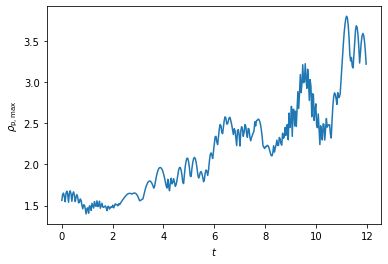

In [6]:
fig, ax = plt.subplots(1, 1)
ax.plot(ts.t, ts.rhopmax)
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\rho_\mathrm{p,max}$')

# See available content of timeseries
The timeseries object stores all you available quantity timeseries. To get an overview use ts.<TAB> to the via autocomplete or use

In [7]:
print([s for s in dir(ts) if not s.startswith('__')])

['Mamax', 'Marms', 'dt', 'ekin', 'ekinp', 'ekintot', 'it', 'keys', 'nparmax', 'npm', 'npmax', 'npmin', 'read', 'rhom', 'rhomax', 'rhomin', 'rhopm', 'rhopmax', 'rhopmin', 'ruxuym', 't', 'u2m', 'um2', 'umax', 'urms', 'ux2m', 'uxm', 'uxuym', 'uy2m', 'uym', 'uz2m', 'uzm', 'vpmax', 'vpx2m', 'vpxm', 'vpy2m', 'vpym', 'vpz2m', 'vpzm', 'walltime']


# Plot all density timeseries in two lines

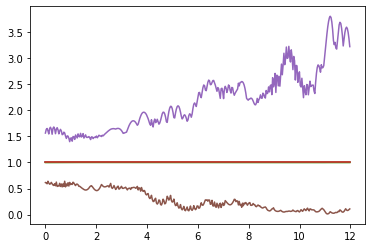

In [8]:
for q in dir(ts):
    if q.startswith('rho'): plt.plot(ts.t, getattr(ts, q))